In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours,TomekLinks,NearMiss,ClusterCentroids
from matplotlib import pyplot
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from imblearn import under_sampling
from typing import Counter
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
%matplotlib inline


In [3]:
# Surpress warnings:
# import warnings
# def warn(*args, **kwargs):
#     pass
# warnings.warn = warn

In [4]:
def plot_confusion_matrix(y, y_predict, t='Confusion Matrix',cm=None):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    if cm is None:
        cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako', fmt=',d').set_title(
        t, fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=10)
    ax.set_ylabel('True labels', fontsize=10)
    # ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    ax.yaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    plt.show()

In [5]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [6]:
def report(yt, y_pred):
    d = {"Accuracy": accuracy_score(yt, y_pred),
         "Precision": precision_score(yt, y_pred),
         "Recall": recall_score(yt, y_pred),
         "F1 score": f1_score(yt, y_pred)}
    rep = pd.DataFrame(d, index=[0])
    print(rep)
    return rep


In [8]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [9]:
#adding target column to our train dataset
df['target'] = target['target']

In [10]:
df.drop('V1',axis = 1, inplace = True) 

In [11]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','target']
df.columns = columns
# df.head()

In [12]:
df['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

In [13]:
df.head()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,target
0,3,45.0,2,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,0
1,2,45.0,7,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,0
2,2,50.0,3,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,0
3,2,45.0,2,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,0
4,2,55.0,7,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,0


<h1> Combination Of Oversampling and Undersampling Techniques </h1>

In [14]:
x = {}
y = {} 
x_train = {} 
x_test = {} 
y_train = {} 
y_test = {}
drep={}
cmd={}

In [15]:
smtn = SMOTEENN(sampling_strategy=0.05,
                enn=EditedNearestNeighbours(n_neighbors=60))
x['SMOTEENN'], y['SMOTEENN']= smtn.fit_resample(df.drop('target',axis=1), df['target'])
x_train['SMOTEENN'], x_test['SMOTEENN'], y_train['SMOTEENN'], y_test['SMOTEENN'] = train_test_split(x['SMOTEENN'], y['SMOTEENN'], test_size=0.25, random_state=42)
print(y_train['SMOTEENN'].value_counts(), "\n", y_test['SMOTEENN'].value_counts())
st_x = StandardScaler()
x_train['SMOTEENN'] = st_x.fit_transform(x_train['SMOTEENN'])
x_test['SMOTEENN'] = st_x.transform(x_test['SMOTEENN'])


target
0    10395
1     1239
Name: count, dtype: int64 
 target
0    3490
1     388
Name: count, dtype: int64


In [16]:
smt = SMOTE(random_state=0, sampling_strategy=0.10)
smtmk= SMOTETomek(sampling_strategy=0.05, smote=smt, tomek=TomekLinks(sampling_strategy='majority'))
x['SMOTETomek'], y['SMOTETomek'] = smtmk.fit_resample( df.drop('target', axis=1), df['target'])
x_train['SMOTETomek'], x_test['SMOTETomek'], y_train['SMOTETomek'], y_test['SMOTETomek'] = train_test_split(
    x['SMOTETomek'], y['SMOTETomek'], test_size=0.25, random_state=42)
print(y_train['SMOTETomek'].value_counts(),
      "\n", y_test['SMOTETomek'].value_counts())
st_x = StandardScaler()
x_train['SMOTETomek'] = st_x.fit_transform(x_train['SMOTETomek'])
x_test['SMOTETomek'] = st_x.transform(x_test['SMOTETomek'])


target
0    24204
1     2429
Name: count, dtype: int64 
 target
0    8053
1     825
Name: count, dtype: int64


In [41]:
#best oversampling was random oversampler and best undersampler was allKNN, so manually combining them.
from imblearn.under_sampling import AllKNN
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.04)
xo, yo= oversample.fit_resample(df.drop('target',axis=1), df['target'])
undersample= AllKNN(n_jobs=-1, n_neighbors=45)
x['ROSKNN'], y['ROSKNN']= undersample.fit_resample(xo, yo)
x_train['ROSKNN'], x_test['ROSKNN'], y_train['ROSKNN'], y_test['ROSKNN'] = train_test_split(x['ROSKNN'], y['ROSKNN'], test_size=0.25, random_state=42)
print(y['ROSKNN'].value_counts(), "\n", y_test['ROSKNN'].value_counts())
st_x= StandardScaler()
x_train['ROSKNN']= st_x.fit_transform(x_train['ROSKNN'])
x_test['ROSKNN']= st_x.transform(x_test['ROSKNN'])



target
0    12358
1     1301
Name: count, dtype: int64 
 target
0    3096
1     319
Name: count, dtype: int64


In [42]:
cst = ['SMOTEENN', 'SMOTETomek', 'ROSKNN']
for i in cst:
    print(i, x_train[i].shape, x_test[i].shape, y_train[i].shape, y_test[i].shape)
    print(Counter(y_train[i]), Counter(y_test[i]), "\n\n")
    # y_test['TL'].shape


SMOTEENN (11634, 39) (3878, 39) (11634,) (3878,)
Counter({0: 10395, 1: 1239}) Counter({0: 3490, 1: 388}) 


SMOTETomek (26633, 39) (8878, 39) (26633,) (8878,)
Counter({0: 24204, 1: 2429}) Counter({0: 8053, 1: 825}) 


ROSKNN (10244, 39) (3415, 39) (10244,) (3415,)
Counter({0: 9262, 1: 982}) Counter({0: 3096, 1: 319}) 




In [43]:
from sklearn.linear_model import LogisticRegression
cmm = []
clf = LogisticRegression()
for i in cst:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combi-sampling :")
    drep['LR']=report(y_test[i], y_pred)
    print("\n")
cmd['LR']=cmm

c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.925993   0.748768  0.391753  0.514382


SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.935233   0.952899  0.318788  0.477748


ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.934407   0.768362  0.426332  0.548387




c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

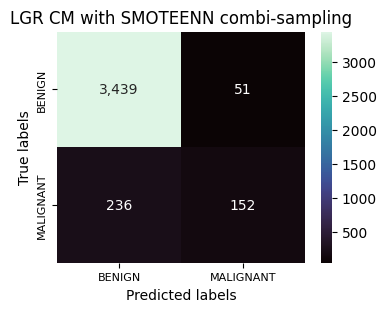

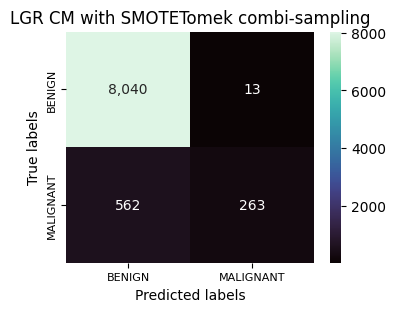

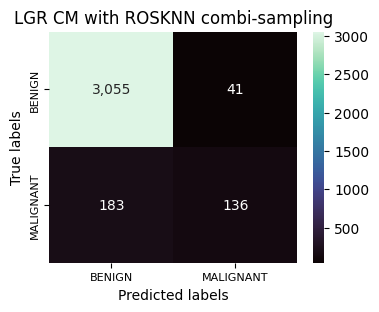

In [44]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGR CM with {cst[n]} combi-sampling', cm=i)


<h1> Decision Tree Model </h1>

In [45]:
cmm=[]
clf = DecisionTreeClassifier()
for i in cst:
    clf = clf.fit(x_train[i],y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
    # print(confusion_matrix(y_test[i],y_pred))
    print(i+" Combi-sampling :")
    drep['DTC']= report(y_test[i], y_pred)
    print("\n")
cmd['DTC']=cmm

SMOTEENN Combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.918515   0.587805  0.621134   0.60401


SMOTETomek Combi-sampling :
   Accuracy  Precision   Recall  F1 score
0  0.945371   0.691874  0.74303   0.71654


ROSKNN Combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.966911   0.778378  0.902821  0.835994




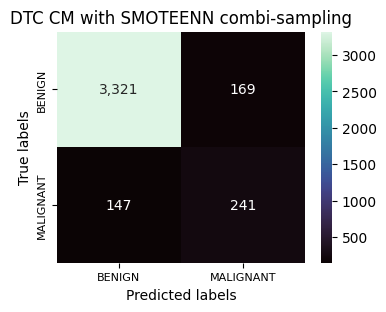

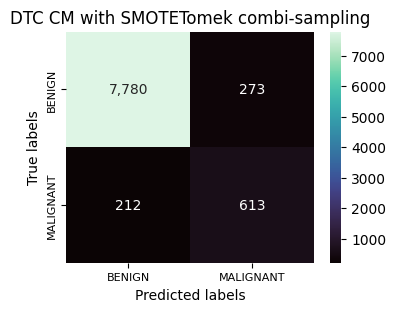

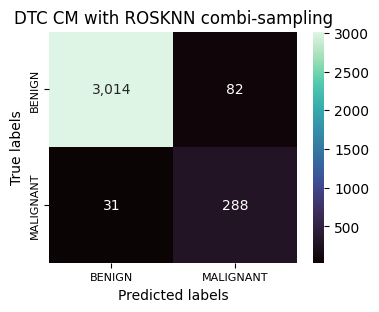

In [46]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'DTC CM with {cst[n]} combi-sampling', cm=i)


<h1> KNeighbors Classifier <hq>

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)
cmm=[]
for i in cst:
    clf = clf.fit(x_train[i],y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
    print(i+" combi-sampling :")
    drep['KNN']= report(y_test[i], y_pred)
    print("\n\n")
cmd['KNN']=cmm

SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.939402   0.717949  0.649485  0.682003



SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.941879   0.663147  0.761212  0.708804



ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.952562   0.757377  0.724138  0.740385





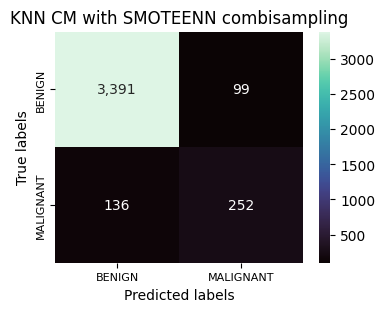

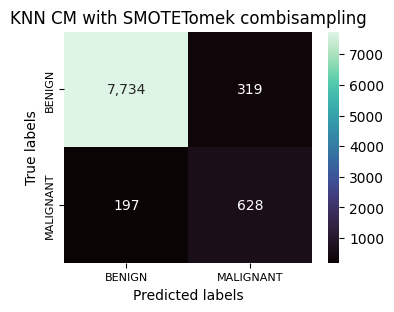

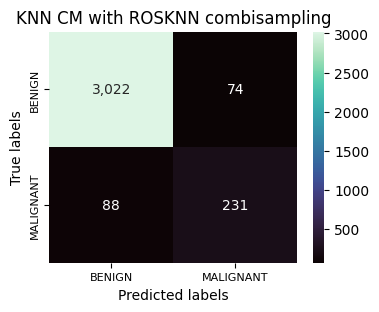

In [48]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'KNN CM with {cst[n]} combisampling', cm=i)


In [49]:
cmm=[]
clf= SVC()
for i in cst:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combi-sampling :")
    drep['SVC']=report(y_test[i], y_pred)
    print("\n")
cmd['SVC']=cmm


SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.926509    0.80117  0.353093  0.490161


SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0   0.91034   0.837209  0.043636  0.082949


ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.947584   0.860825  0.523511  0.651072




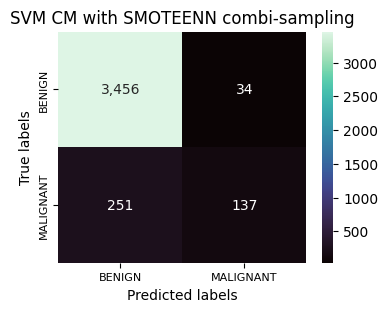

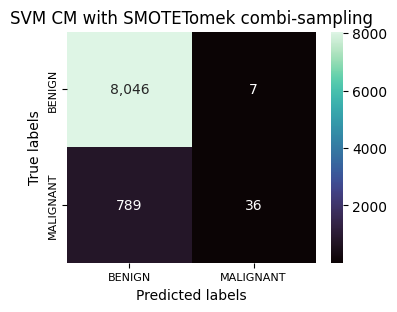

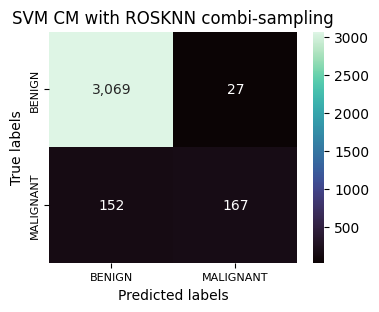

In [50]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'SVM CM with {cst[n]} combi-sampling', cm=i)

In [51]:
from sklearn.ensemble import RandomForestClassifier
cmm=[]
for i in cst:
    clf= RandomForestClassifier(n_estimators=200, criterion='gini')
    clf=clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combi-sampling :")
    drep['RFC']= report(y_test[i], y_pred)
    print("\n")
cmd['RFC']=cmm

SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0    0.9541   0.923387  0.590206  0.720126


SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.959338   0.991525  0.567273  0.721665


ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.986237   0.953333  0.896552  0.924071




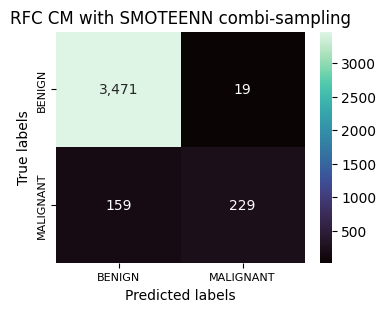

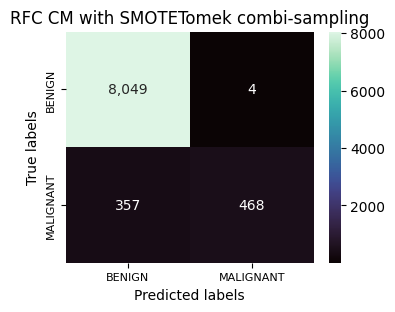

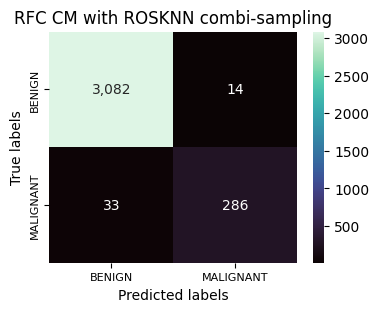

In [52]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'RFC CM with {cst[n]} combi-sampling', cm=i)
    

In [53]:
from xgboost import XGBClassifier
cmm=[]
for i in cst:
    clf = XGBClassifier()
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combi-sampling :")
    drep['XGB']=report(y_test[i], y_pred)
    print("\n")
cmd['XGB']=cmm

SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0   0.96622   0.924092  0.721649   0.81042


SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.981415   0.995495  0.803636  0.889336


ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.985944   0.941368  0.905956  0.923323




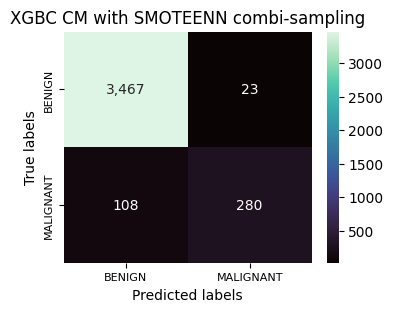

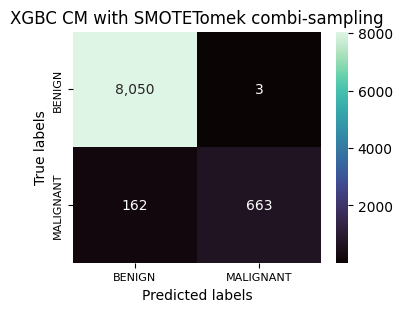

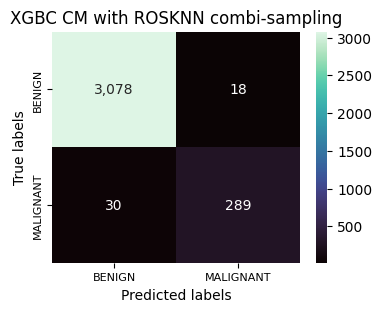

In [54]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'XGBC CM with {cst[n]} combi-sampling', cm=i)


In [55]:
from lightgbm import LGBMClassifier
cmm=[]
clf = LGBMClassifier(learning_rate=0.25, n_estimators=100, num_leaves=100)

for i in cst:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combi-sampling :")
    drep['LGBM']=report(y_test[i], y_pred)
    print("\n")
cmd['LGBM']=cmm

SMOTEENN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.969572   0.938312  0.744845   0.83046


SMOTETomek combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.981978   0.989691  0.814545  0.893617


ROSKNN combi-sampling :
   Accuracy  Precision    Recall  F1 score
0  0.987994   0.960265  0.909091  0.933977




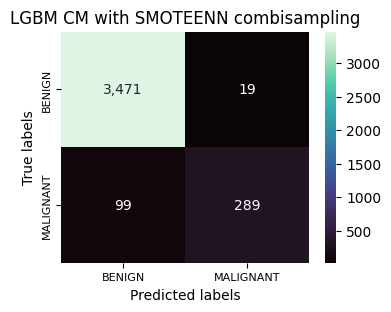

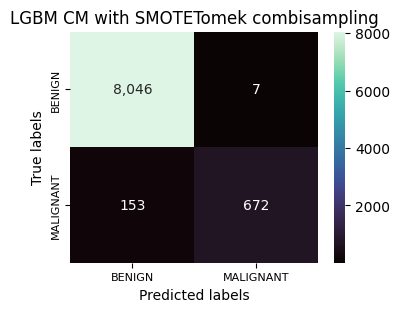

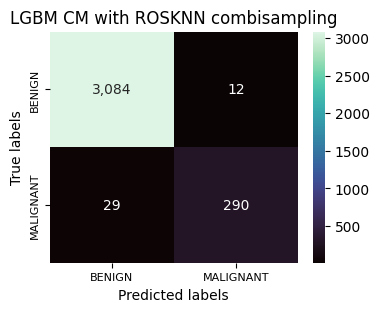

In [56]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGBM CM with {cst[n]} combisampling', cm=i)


In [57]:
from sklearn.ensemble import AdaBoostClassifier
cmm = []
tr= DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(estimator= tr, n_estimators=200, learning_rate=0.1, random_state=0)
for i in cst:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    drep['AdaB'] = print(confusion_matrix(y_test[i], y_pred))
    print(i+" combisampling :")
    report(y_test[i], y_pred)
    print("\n")
cmd['AdaB']=cmm

[[3461   29]
 [ 119  269]]
SMOTEENN combisampling :
   Accuracy  Precision    Recall  F1 score
0  0.961836   0.902685  0.693299  0.784257


[[8042   11]
 [ 172  653]]
SMOTETomek combisampling :
   Accuracy  Precision    Recall  F1 score
0  0.979387   0.983434  0.791515  0.877099


[[3087    9]
 [  28  291]]
ROSKNN combisampling :
   Accuracy  Precision    Recall  F1 score
0  0.989165       0.97  0.912226  0.940226




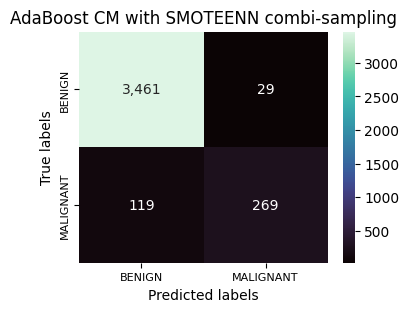

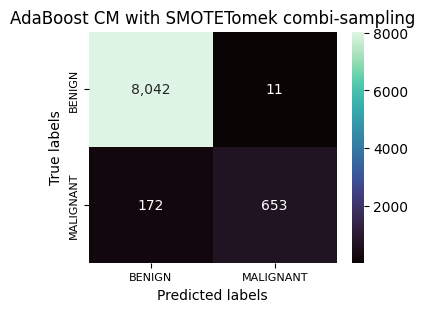

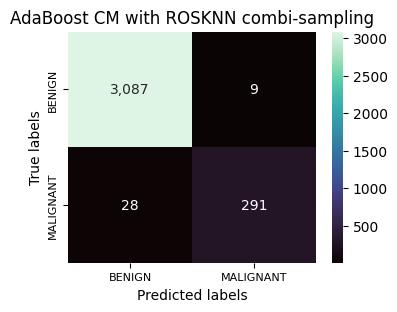

In [58]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'AdaBoost CM with {cst[n]} combi-sampling', cm=i)

In [59]:
from catboost import CatBoostClassifier as CBC
cmm=[]
clf= CBC(learning_rate=0.1)
for i in cst:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" combisampling :")
    drep['CB'] = report(y_test[i], y_pred)
    print("\n")
cmd['CB']=cmm

0:	learn: 0.5702158	total: 12.5ms	remaining: 12.5s
1:	learn: 0.4891939	total: 24.1ms	remaining: 12s
2:	learn: 0.4287566	total: 35.4ms	remaining: 11.8s
3:	learn: 0.3828449	total: 46.5ms	remaining: 11.6s
4:	learn: 0.3526395	total: 58.1ms	remaining: 11.6s
5:	learn: 0.3197830	total: 71.7ms	remaining: 11.9s
6:	learn: 0.2967389	total: 85.4ms	remaining: 12.1s
7:	learn: 0.2811872	total: 99.4ms	remaining: 12.3s
8:	learn: 0.2678830	total: 112ms	remaining: 12.3s
9:	learn: 0.2536466	total: 123ms	remaining: 12.2s
10:	learn: 0.2459948	total: 135ms	remaining: 12.2s
11:	learn: 0.2375389	total: 149ms	remaining: 12.2s
12:	learn: 0.2284887	total: 162ms	remaining: 12.3s
13:	learn: 0.2230009	total: 174ms	remaining: 12.3s
14:	learn: 0.2172895	total: 187ms	remaining: 12.3s
15:	learn: 0.2120994	total: 199ms	remaining: 12.2s
16:	learn: 0.2071279	total: 219ms	remaining: 12.7s
17:	learn: 0.2029637	total: 233ms	remaining: 12.7s
18:	learn: 0.1983068	total: 245ms	remaining: 12.7s
19:	learn: 0.1957730	total: 259ms	r

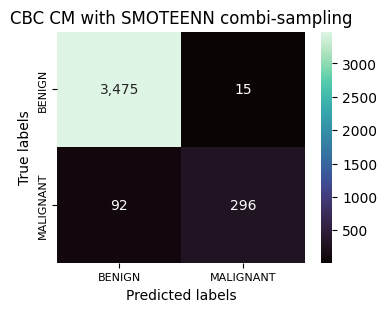

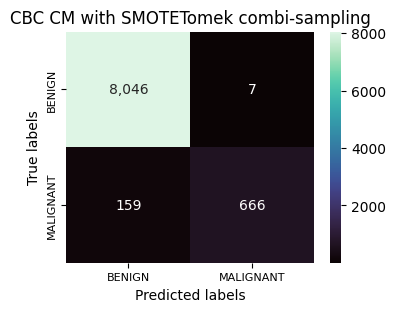

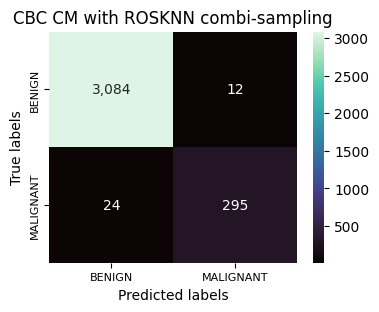

In [60]:
for n,i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'CBC CM with {cst[n]} combi-sampling', cm=i)

In [61]:
for i in cst:
    print(i, x_train[i].shape, x_test[i].shape,
          y_train[i].shape, y_test[i].shape)
    print(Counter(y_train[i]), Counter(y_test[i]), "\n\n")


SMOTEENN (11634, 39) (3878, 39) (11634,) (3878,)
Counter({0: 10395, 1: 1239}) Counter({0: 3490, 1: 388}) 


SMOTETomek (26633, 39) (8878, 39) (26633,) (8878,)
Counter({0: 24204, 1: 2429}) Counter({0: 8053, 1: 825}) 


ROSKNN (10244, 39) (3415, 39) (10244,) (3415,)
Counter({0: 9262, 1: 982}) Counter({0: 3096, 1: 319}) 




In [62]:
for i in drep.keys():
    print(i)
    print(drep[i])
    print(cmd[i])
    print()

LR
   Accuracy  Precision    Recall  F1 score
0  0.934407   0.768362  0.426332  0.548387
[array([[3439,   51],
       [ 236,  152]], dtype=int64), array([[8040,   13],
       [ 562,  263]], dtype=int64), array([[3055,   41],
       [ 183,  136]], dtype=int64)]

DTC
   Accuracy  Precision    Recall  F1 score
0  0.966911   0.778378  0.902821  0.835994
[array([[3321,  169],
       [ 147,  241]], dtype=int64), array([[7780,  273],
       [ 212,  613]], dtype=int64), array([[3014,   82],
       [  31,  288]], dtype=int64)]

KNN
   Accuracy  Precision    Recall  F1 score
0  0.952562   0.757377  0.724138  0.740385
[array([[3391,   99],
       [ 136,  252]], dtype=int64), array([[7734,  319],
       [ 197,  628]], dtype=int64), array([[3022,   74],
       [  88,  231]], dtype=int64)]

SVC
   Accuracy  Precision    Recall  F1 score
0  0.947584   0.860825  0.523511  0.651072
[array([[3456,   34],
       [ 251,  137]], dtype=int64), array([[8046,    7],
       [ 789,   36]], dtype=int64), array([